In [2]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=16)
import os
import pandas as pd
from numpy.random import random
import numpy as np
from utils.chatbot import QWENChatBot
from pandarallel import pandarallel
import json
import time
import random
from collections import Counter
import jieba  # For Chinese text segmentation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [28]:
df2 = pd.read_excel('processed_data/03_tagged_processed_cleaned.xlsx')
df2

内容  \
0     1️⃣📍Drury 188-189 在holborn附近的网红brunch，点的开心果pan...   
1     拖延症患者终于来开箱了，攒了一个多月的购物&护肤品分享，还有收到的礼物开箱，不算很齐全塞不下...   
2     一共三个店，黑彩，白彩，咖啡店～ 说实话三个店都非常可爱！但人真的好多！！（凑热闹本人+1）...   
3     开箱めLv村上隆包包■黑三彩Carryall 联名款黑武士羊皮carryall开箱分享 真的...   
4     好可爱呀！兼并了美貌和实用#卡包推荐[话题]##钱包推荐[话题]#  #lv[话题]# #l...   
...                                                 ...   
2622  800年没买trainer的我陪母上大人逛街顺利蹭到一双[派对R][吐舌头H][耶R] #鞋...   
2623  村上隆太阳花熊猫。还有比这个组合更合适的包给我们花花吗[派对R][派对R][派对R]#LV ...   
2624  #lv村上隆快闪店 太出片啦！！！今天下午去的，除了咖啡店拍的时间久点外，其他都很快，地方也...   
2625  lv村上隆联名这次出的speedy系列，比speedy30小的只有speedynano，有看...   
2626                    #首尔 #lv村上隆联名 #克罗心 #罗意威鞋子 #加拿大鹅🦢   

                                            raw_tagging  \
0     {\n    "Age_Range": "18-24岁",\n    "Gender": "...   
1     {\n    "Age_Range": "25-34岁",\n    "Gender": "...   
2     {\n    "Age_Range": "18-24岁",\n    "Gender": "...   
3     {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
4     {\n    "Age_Range": "",\n    "Gender": "女性",\n...   
...                                                 ...   
2622  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
2623  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
2624  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
2625  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
2626  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   

                                            parsed_json Age_Range Gender  \
0     {'Age_Range': '18-24岁', 'Gender': '女性', 'City_...    18-24岁     女性   
1     {'Age_Range': '25-34岁', 'Gender': '女性', 'City_...    25-34岁     女性   
2     {'Age_Range': '18-24岁', 'Gender': '女性', 'City_...    18-24岁     女性   
3     {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
4     {'Age_Range': '', 'Gender': '女性', 'City_Tier':...       NaN     女性   
...                                                 ...       ...    ...   
2622  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
2623  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
2624  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
2625  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
2626  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   

     City_Tier Purchase_Purpose Purchase_Situation  \
0          NaN              NaN                NaN   
1           一线          个人喜好/收藏                NaN   
2          NaN            打卡/拍照                NaN   
3          NaN           追求独特设计                NaN   
4          NaN           追求独特设计                NaN   
...        ...              ...                ...   
2622       NaN             陪伴购物                 逛街   
2623       NaN           追求独特设计                NaN   
2624       NaN              NaN                NaN   
2625       NaN           追求独特设计                NaN   
2626       NaN              NaN                NaN   

                       Product_Mention              Competitor  ...  \
0                                   []                      []  ...   
1                         ['LV水貂帽衫背心']    ['miumiu', 'Chanel']  ...   
2                                   []                      []  ...   
3     ['黑三彩Carryall', '黑武士羊皮carryall']                      []  ...   
4                         ['卡包', '钱包']                      []  ...   
...                                ...                     ...  ...   
2622                       ['trainer']                      []  ...   
2623                ['村上隆太阳花熊猫', '手袋']                      []  ...   
2624                                []                      []  ...   
2625        ['speedy系列', 'speedynano']                      []  ...   
2626                                []  ['克罗心', '罗意威', '加拿大鹅']  ...   

     Past_Purchase  Tone Purpose_Category Situation_Category Emotion_Category  \
0                否  活泼俏皮            未明确提及              未明确提及            未明确提及   
1                是  成熟稳重            收藏&投资              未明确

In [39]:
df = pd.read_excel('processed_data/04_segmentation.xlsx')
import ast
col_list = ['Style_Category', 'Functionality_Category', 'Element_Category',
       'Product_Category', 'Competitor_Category','Product_Mention','Competitor','Keywords_Design_Elements', 'Keywords_Design_Style',
       'Keywords_Functionality']
for col in col_list:

# Convert string representations of lists to actual Python lists
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df

内容  \
0     1️⃣📍Drury 188-189 在holborn附近的网红brunch，点的开心果pan...   
1     拖延症患者终于来开箱了，攒了一个多月的购物&护肤品分享，还有收到的礼物开箱，不算很齐全塞不下...   
2     一共三个店，黑彩，白彩，咖啡店～ 说实话三个店都非常可爱！但人真的好多！！（凑热闹本人+1）...   
3     开箱めLv村上隆包包■黑三彩Carryall 联名款黑武士羊皮carryall开箱分享 真的...   
4     好可爱呀！兼并了美貌和实用#卡包推荐[话题]##钱包推荐[话题]#  #lv[话题]# #l...   
...                                                 ...   
2622  800年没买trainer的我陪母上大人逛街顺利蹭到一双[派对R][吐舌头H][耶R] #鞋...   
2623  村上隆太阳花熊猫。还有比这个组合更合适的包给我们花花吗[派对R][派对R][派对R]#LV ...   
2624  #lv村上隆快闪店 太出片啦！！！今天下午去的，除了咖啡店拍的时间久点外，其他都很快，地方也...   
2625  lv村上隆联名这次出的speedy系列，比speedy30小的只有speedynano，有看...   
2626                    #首尔 #lv村上隆联名 #克罗心 #罗意威鞋子 #加拿大鹅🦢   

                                            raw_tagging  \
0     {\n    "Age_Range": "18-24岁",\n    "Gender": "...   
1     {\n    "Age_Range": "25-34岁",\n    "Gender": "...   
2     {\n    "Age_Range": "18-24岁",\n    "Gender": "...   
3     {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
4     {\n    "Age_Range": "",\n    "Gender": "女性",\n...   
...                                                 ...   
2622  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
2623  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
2624  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
2625  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   
2626  {\n    "Age_Range": "",\n    "Gender": "",\n  ...   

                                            parsed_json Age_Range Gender  \
0     {'Age_Range': '18-24岁', 'Gender': '女性', 'City_...    18-24岁     女性   
1     {'Age_Range': '25-34岁', 'Gender': '女性', 'City_...    25-34岁     女性   
2     {'Age_Range': '18-24岁', 'Gender': '女性', 'City_...    18-24岁     女性   
3     {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
4     {'Age_Range': '', 'Gender': '女性', 'City_Tier':...       NaN     女性   
...                                                 ...       ...    ...   
2622  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
2623  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
2624  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
2625  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   
2626  {'Age_Range': '', 'Gender': '', 'City_Tier': '...       NaN    NaN   

     City_Tier Purchase_Purpose Purchase_Situation  \
0          NaN              NaN                NaN   
1           一线          个人喜好/收藏                NaN   
2          NaN            打卡/拍照                NaN   
3          NaN           追求独特设计                NaN   
4          NaN           追求独特设计                NaN   
...        ...              ...                ...   
2622       NaN             陪伴购物                 逛街   
2623       NaN           追求独特设计                NaN   
2624       NaN              NaN                NaN   
2625       NaN           追求独特设计                NaN   
2626       NaN              NaN                NaN   

                   Product_Mention        Competitor  ...  Tone  \
0                               []                []  ...  活泼俏皮   
1                       [LV水貂帽衫背心]  [miumiu, Chanel]  ...  成熟稳重   
2                               []                []  ...  活泼俏皮   
3     [黑三彩Carryall, 黑武士羊皮carryall]                []  ...  成熟稳重   
4                         [卡包, 钱包]                []  ...  活泼俏皮   
...                            ...               ...  ...   ...   
2622                     [trainer]                []  ...  活泼俏皮   
2623                [村上隆太阳花熊猫, 手袋]                []  ...  活泼俏皮   
2624                            []                []  ...  活泼俏皮   
2625        [speedy系列, speedynano]                []  ...  成熟稳重   
2626                            []  [克罗心, 罗意威, 加拿大鹅]  ...   NaN   

     Purpose_Category Situation_Category Emotion_Category Style_Category  \
0               未明确提及              未明确提及            未明确提及        [未明确提及]   
1               收藏&投资              未明确提及               喜欢        [未明确提及]   
2                社交需求              未明确提及

In [112]:
tmp = df[df.persona !='无法确定']
tmp.persona.value_counts()/len(tmp)

persona
潮流先锋       0.649175
复古怀旧派      0.125000
实用主义者      0.116745
高端需求消费者    0.109080
Name: count, dtype: float64

In [5]:
df['persona'].value_counts()

persona
潮流先锋       1101
无法确定        931
复古怀旧派       212
实用主义者       198
高端需求消费者     185
Name: count, dtype: int64

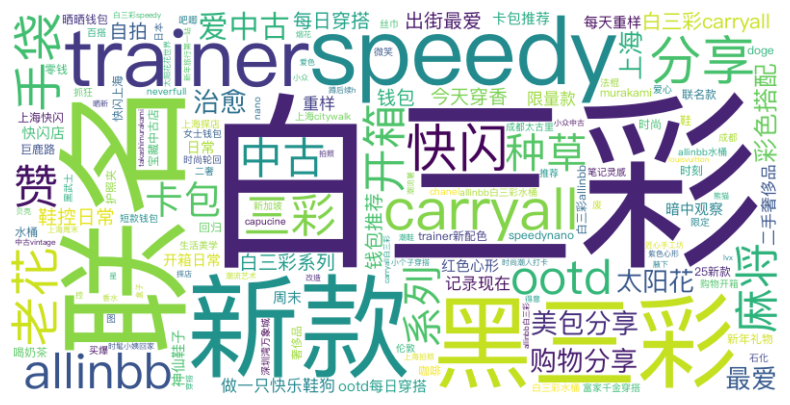

In [45]:
import re
# Concatenate all text in the pandas Series into a single string
stopwords_path = 'cn_stopwords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = set([line.strip() for line in f])
stopwords.update(['话题','飞吻','害羞','偷笑','萌萌哒','捂脸','失望','捂脸','害羞','派对','笑哭','R','r','笑','哭','大笑','汗颜','惹','皱眉','叹气','色色','萌萌','哒'])
stopwords.update(['lv','lv村上隆','村上隆','路易威登','包包','包','路易','威登','路', '易', '威', '登','易威登','louisvuitton'])
text = ' '.join(df['内容'])
jieba.add_word("村上隆")
jieba.add_word("lv")
jieba.add_word("Louis Vuitton")
# Tokenize the text using jieba
tokenized_text = jieba.lcut(text)
text_final = []
for word in tokenized_text:
    if re.match(r'^[a-zA-Z\s]+$', word):  # Matches English words/spaces
        word = word.lower().replace(" ", "")  # Convert to lowercase, remove spaces 
    # Keep the word only if it's not in stopwords
    if word not in stopwords:
        text_final.append(word)
word_freq = Counter(text_final)
text_final = ''.join(text_final)
# Specify the path to a Chinese-compatible font
font_path = '/System/Library/Fonts/PingFang.ttc'  # Adjust path to your Mac's Chinese font file

# Generate the word cloud
wordcloud = WordCloud(
    font_path=font_path,  # Specify Chinese font
    background_color='white',  # Background color of the word cloud
    width=800,  # Width of the generated image
    height=400,  # Height of the generated image
    max_words=150,  # Maximum number of words in the word cloud
    collocations=False  # Avoid duplicate words
).generate(text_final)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [51]:
word_scores = wordcloud.words_
word_scores
with open("wordcloud_overall.json", "w", encoding="utf-8") as json_file:
    json.dump(word_scores, json_file, indent=4, ensure_ascii=False)


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/vx/fds6ny9x1_dfqfcmdl61lsmw0000gp/T/jieba.cache
Loading model cost 0.383 seconds.
Prefix dict has been built successfully.


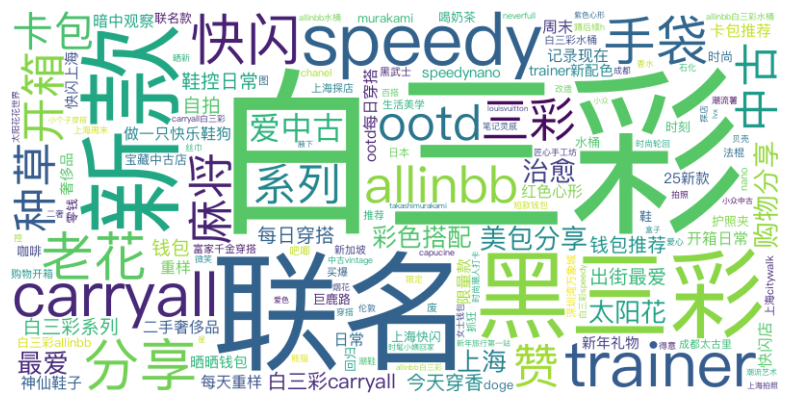

In [6]:
import re
# Concatenate all text in the pandas Series into a single string
stopwords_path = 'cn_stopwords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = set([line.strip() for line in f])
stopwords.update(['话题','飞吻','害羞','偷笑','萌萌哒','捂脸','失望','捂脸','害羞','派对','笑哭','R','r','笑','哭','大笑','汗颜','惹','皱眉','叹气','色色','萌萌','哒'])
stopwords.update(['lv','lv村上隆','村上隆','路易威登','包包','包','路易','威登','路', '易', '威', '登','易威登','louisvuitton'])
def plot_wordcloud(df,max_words = 150,stopwords = stopwords):
    text = ' '.join(df['内容'])
    jieba.add_word("村上隆")
    jieba.add_word("lv")
    jieba.add_word("Louis Vuitton")
    # Tokenize the text using jieba
    tokenized_text = jieba.lcut(text)
    text_final = []
    for word in tokenized_text:
        if re.match(r'^[a-zA-Z\s]+$', word):  # Matches English words/spaces
            word = word.lower().replace(" ", "")  # Convert to lowercase, remove spaces 
        # Keep the word only if it's not in stopwords
        if word not in stopwords:
            text_final.append(word)
    text_final = ''.join(text_final)
    # Specify the path to a Chinese-compatible font
    font_path = '/System/Library/Fonts/PingFang.ttc'  # Adjust path to your Mac's Chinese font file

    # Generate the word cloud
    wordcloud = WordCloud(
        font_path=font_path,  # Specify Chinese font
        background_color='white',  # Background color of the word cloud
        width=800,  # Width of the generated image
        height=400,  # Height of the generated image
        max_words=150,  # Maximum number of words in the word cloud
        collocations=False  # Avoid duplicate words
    ).generate(text_final)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()
plot_wordcloud(df)

In [35]:
# Replace 'type' with 'newType' in each string inside the lists
df['Product_Category'] = df['Product_Category'].apply(
    lambda x: [item.replace('accessorries', 'accessories') for item in x]  # Process each list element
)

print(df)

                                                     内容  \
0     1️⃣📍Drury 188-189 在holborn附近的网红brunch，点的开心果pan...   
1     拖延症患者终于来开箱了，攒了一个多月的购物&护肤品分享，还有收到的礼物开箱，不算很齐全塞不下...   
2     一共三个店，黑彩，白彩，咖啡店～ 说实话三个店都非常可爱！但人真的好多！！（凑热闹本人+1）...   
3     开箱めLv村上隆包包■黑三彩Carryall 联名款黑武士羊皮carryall开箱分享 真的...   
4     好可爱呀！兼并了美貌和实用#卡包推荐[话题]##钱包推荐[话题]#  #lv[话题]# #l...   
...                                                 ...   
2622  800年没买trainer的我陪母上大人逛街顺利蹭到一双[派对R][吐舌头H][耶R] #鞋...   
2623  村上隆太阳花熊猫。还有比这个组合更合适的包给我们花花吗[派对R][派对R][派对R]#LV ...   
2624  #lv村上隆快闪店 太出片啦！！！今天下午去的，除了咖啡店拍的时间久点外，其他都很快，地方也...   
2625  lv村上隆联名这次出的speedy系列，比speedy30小的只有speedynano，有看...   
2626                    #首尔 #lv村上隆联名 #克罗心 #罗意威鞋子 #加拿大鹅🦢   

                                            raw_tagging  \
0     {\n    "Age_Range": "18-24岁",\n    "Gender": "...   
1     {\n    "Age_Range": "25-34岁",\n    "Gender": "...   
2     {\n    "Age_Range": "18-24岁",\n    "Gender": "...   
3     {\n    "Age_Range": "",\n    "Gender": "",\n  ...

In [54]:
df['Product_Category'].value_counts()

Product_Category
[未明确提及]                                                       695
[speedy]                                                      386
[其他]                                                          309
[accessories]                                                 143
[small leather goods]                                         134
                                                             ... 
[neverfull, carryall, side trunk, small leather goods, 其他]      1
[speedy, carryall, other, small leather goods, 其他]              1
[all in bb, carryall, speedy]                                   1
[accessories, neverfull, carryall, speedy]                      1
[accessories, all in bb, speedy]                                1
Name: count, Length: 145, dtype: int64

In [56]:
len(df)-695-309

1623

In [ ]:
len(df[~df['Product_Category'].isin('未明确提及'])] )

In [57]:
Counter([j for i in df['Product_Category'] for j in i if j not in (['其他','未明确提及','other'])])#/len(df[~df['Product_Category'].isin(['未明确提及'])] )

Counter({'speedy': 900,
         'accessories': 347,
         'small leather goods': 334,
         'carryall': 294,
         'side trunk': 113,
         'all in bb': 104,
         'neverfull': 54,
         'capucines': 50,
         'suitcase': 11})

In [74]:
Counter([j for i in df['Product_Mention'] for j in i if j not in (['其他','未明确提及','other'])])

Counter({'白三彩': 322,
         '黑三彩': 104,
         'lv白三彩': 94,
         'lv村上隆': 80,
         'speedy': 76,
         'carryall': 60,
         '麻将包': 36,
         'lv村上隆白三彩': 35,
         'trainer': 32,
         '钱包': 30,
         '卡包': 28,
         '护照夹': 28,
         'nano': 27,
         '丝巾': 25,
         'nano speedy': 24,
         'LV白三彩': 23,
         '包包': 22,
         '鞋子': 22,
         '包': 20,
         'lvtrainer': 20,
         '三彩': 19,
         '零钱包': 19,
         'lv村上隆手袋': 16,
         '黑白三彩': 16,
         'LV村上隆': 15,
         '村上隆': 15,
         '手袋': 15,
         'Trainer': 14,
         '白三彩carryall': 14,
         '鞋': 14,
         '白三彩双肩包': 14,
         '白三彩水桶包': 13,
         '香水': 13,
         '村上隆限量款': 13,
         'all in bb': 13,
         'allinbb': 13,
         '水桶包': 12,
         'speedynano': 12,
         'speedy nano': 12,
         '村上隆联名款': 12,
         'lv村上隆联名': 12,
         'LV黑三彩': 12,
         '33彩': 12,
         '保龄球': 11,
         'lv白三彩包': 11,
       

In [73]:
print(900/1623)
print(347/1623)
print(334/1623)
print(294/1623)
print(113/1623)

0.5545286506469501
0.21380160197165743
0.20579174368453482
0.18114602587800369
0.0696241528034504


In [171]:
df = df[df['persona']!='无法确定']
word_score = {}
persona_word_counts = {}
persona_total_words = {}
# Step 1: Compute word frequencies per persona, store results in persona_word_counts
stopwords.update(['','[',']','#','\t','～','\xa0','\ufeff','️','话题','飞吻','害羞','偷笑','萌萌哒','捂脸','失望','捂脸','害羞','派对','笑哭','R','r','笑','哭','大笑','汗颜','惹','皱眉','叹气','色色','萌萌','哒'])

stopwords.update(['lv','lv村上隆','村上隆','路易威登','包包','包','路易','威登','路', '易', '威', '登','易威登','louisvuitton'])
# Step 1: Compute word frequencies per persona, store results in persona_word_counts
for persona in df.persona.unique():
    text = ' '.join(df[df['persona']== persona]['内容'])
    jieba.add_word("carryall")
    jieba.add_word("Carryall")
    jieba.add_word("快时尚")
    jieba.add_word("穿搭")
    jieba.add_word("新款")
    tokens = jieba.lcut(text)
    filtered_tokens = []
    for token in tokens:
        if re.match(r'^[a-zA-Z\s]+$', token):  # Matches English words/spaces
            token = token.lower().replace(" ", "")
        if token not in stopwords:
            filtered_tokens.append(token)
    persona_word_counts[persona] = Counter(filtered_tokens)
    persona_total_words[persona] = sum(Counter(filtered_tokens).values())
# Step 2: Compute document frequency (DF) across all personas
word_in_personas = Counter()  # Count how many personas each word appears in
for word_counts in persona_word_counts.values():
    for word in word_counts:
        word_in_personas[word] += 1
for persona, word_counts in persona_word_counts.items():
    scores = {}
    for word, count in word_counts.items():
        tf = count/persona_total_words[persona]
        idf = np.log(4 / (1 + word_in_personas[word]))
        scores[word] = tf*idf
    word_score[persona] = scores

In [9]:
cols = ['Purpose_Category', 'Purchase_Situation',
       'Keywords_Design_Elements', 'Keywords_Design_Style',
       'Keywords_Functionality',
       'Product_Mention', 'Competitor_Category']

2.072695452380175
潮流先锋


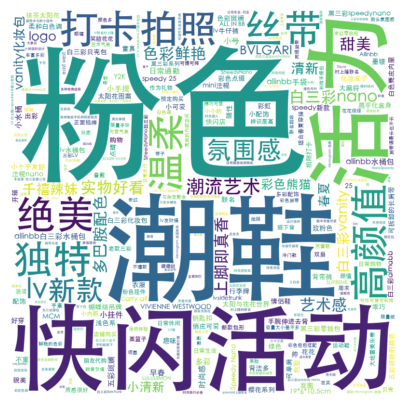

0.019264989013287562
实用主义者


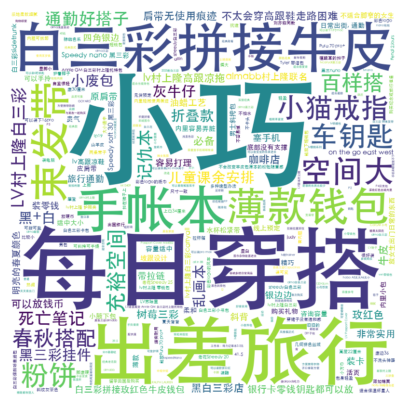

0.13409270531767628
高端需求消费者


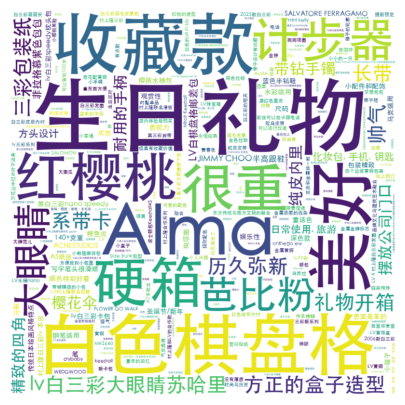

0.005698239269033352
复古怀旧派


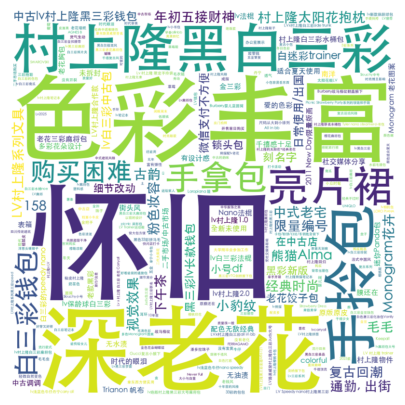

In [124]:
from collections import Counter, defaultdict
persona_words = defaultdict(list)  # Dictionary {persona: [list of all words]}
for i in ['潮流先锋', '实用主义者', '高端需求消费者', '复古怀旧派']:
    all_words = []
    for value in df[df['persona'] == i][cols].values.flatten():
        if isinstance(value, list):  # If value is a list, extend the list
            all_words.extend(value)
        elif isinstance(value, str):  # If value is a string, append it
            all_words.append(value)
    
    # Remove unwanted words like '未明确提及', '其他'
    all_words = [word for word in all_words if word not in ['未明确提及', '其他']]
    persona_words[i] = all_words

# Step 2: Calculate Document Frequency (DF) for each word across personas
document_frequencies = Counter()  # Number of personas containing a word
for words in persona_words.values():  # For each persona's word list
    unique_words = set(words)  # Count each word only once per persona
    document_frequencies.update(unique_words)

# Total number of personas
num_personas = 4

# Step 3: Compute TF-IDF for each persona
# Total unique words across personas
all_words_flat = [word for words in persona_words.values() for word in words]
global_word_count = Counter(all_words_flat)  # Global word frequency

# Step 2: Calculate relative term importance for each persona
persona_wordcloud_data = {}
for persona, words in persona_words.items():
    # Term Frequency (TF) for the persona
    term_counts = Counter(words)  # Count words in the current persona
    total_words_in_persona = sum(term_counts.values())  # Total words in this persona

    # Relative Term Frequency (RTF) for the persona
    rtf = {word: count / total_words_in_persona for word, count in term_counts.items()}

    # Global scaling factor: word importance relative to all personas
    relativeness = {word: (term_counts[word] / global_word_count[word]) for word in term_counts}

    # Persona Specificity: adjust by average RTF in other personas
    specificity = {}
    for word in term_counts:
        # Average RTF across other personas
        other_personas = [p for p in persona_words.keys() if p != persona]
        avg_rtf_other_personas = np.mean([
            persona_words[p].count(word) / len(persona_words[p]) if len(persona_words[p]) > 0 else 0
            for p in other_personas
        ])
        specificity[word] = rtf[word] / (avg_rtf_other_personas + 1e-5)  # Avoid division by zero

    # Combine relativeness and specificity into a final importance score
    final_scores = {word: relativeness[word] * specificity[word] for word in term_counts}

    # Store TF-IDF-like scores for the word cloud
    persona_wordcloud_data[persona] = final_scores


    print(final_scores['蝴蝶结'])
    # Step 4: Generate Word Cloud from TF-IDF scores
    font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
    wordcloud = WordCloud(font_path=font_path,  # Add your font path if necessary
                          max_words=300,
                          width=800, height=800, 
                          background_color='white').generate_from_frequencies(final_scores)
    
    # Display the word cloud
    print(persona)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

潮流先锋


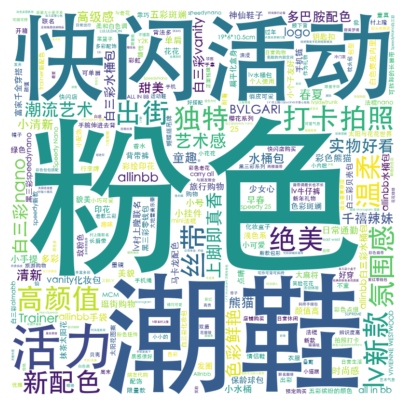

实用主义者


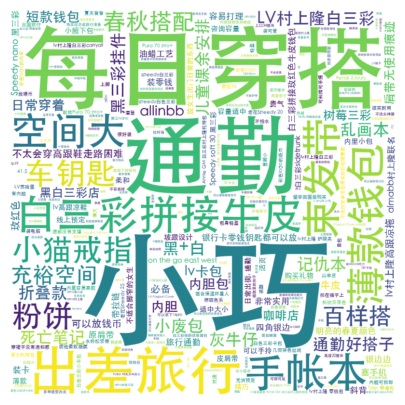

高端需求消费者


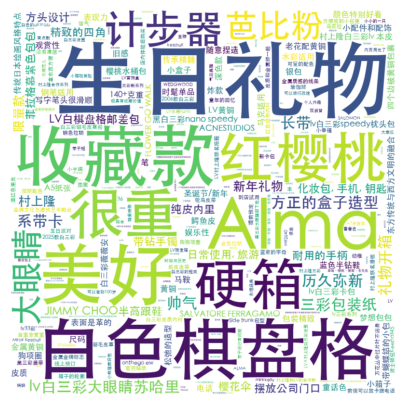

复古怀旧派


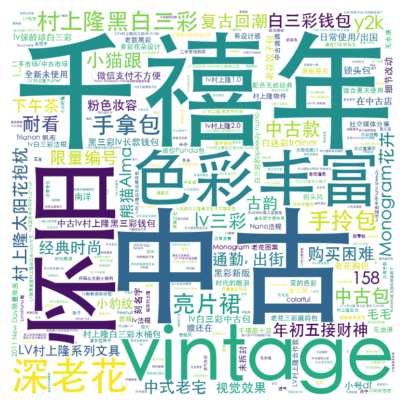

In [10]:
from collections import Counter, defaultdict
persona_words = defaultdict(list)  # Dictionary {persona: [list of all words]}
score_dict = {}
for i in ['潮流先锋', '实用主义者', '高端需求消费者', '复古怀旧派']:
    all_words = []
    for value in df[df['persona'] == i][cols].values.flatten():
        if isinstance(value, list):  # If value is a list, extend the list
            all_words.extend(value)
        elif isinstance(value, str):  # If value is a string, append it
            all_words.append(value)
    
    # Remove unwanted words like '未明确提及', '其他'
    all_words = [word for word in all_words if word not in ['未明确提及', '其他']]
    persona_words[i] = all_words

# Step 2: Calculate Document Frequency (DF) for each word across personas
document_frequencies = Counter()  # Number of personas containing a word
for words in persona_words.values():  # For each persona's word list
    unique_words = set(words)  # Count each word only once per persona
    document_frequencies.update(unique_words)

# Total number of personas
num_personas = 4

# Step 3: Compute TF-IDF for each persona
for persona, words in persona_words.items():
    # Term Frequency (TF) for the current persona
    term_frequencies = Counter(words)  # Count occurrences of each word
    
    # Calculate TF-IDF for each word
    tfidf_scores = {}
    for word, tf in term_frequencies.items():
        document_frequency = document_frequencies[word]  # Document frequency of the word
        idf = np.log(4 / (1+document_frequency))  # Calculate IDF
        tfidf_scores[word] = tf * idf  # Compute TF-IDF: TF * IDF
    score_dict[persona] = tfidf_scores
    # Step 4: Generate Word Cloud from TF-IDF scores
    font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
    wordcloud = WordCloud(font_path=font_path,  # Add your font path if necessary
                          max_words=300,
                          width=800, height=800, 
                          background_color='white').generate_from_frequencies(tfidf_scores)
    
    # Display the word cloud
    print(persona)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [13]:
def convert_numpy(obj):
    if isinstance(obj, np.integer):  # Convert NumPy integers to Python int
        return int(obj)
    elif isinstance(obj, np.floating):  # Convert NumPy floats to Python float
        return float(obj)
    elif isinstance(obj, np.ndarray):  # Convert NumPy arrays to Python lists
        return obj.tolist()
    elif isinstance(obj, np.bool_):  # Convert NumPy booleans to Python bool
        return bool(obj)
    else:
        raise TypeError(f"Type {type(obj)} not serializable")
with open("wordclouds.json", "w", encoding="utf-8") as json_file:
    json.dump(score_dict, json_file, indent=4, default=convert_numpy, ensure_ascii=False)

In [75]:
score_dict

{'潮流先锋': {'店里购买': 0.0005657708628005657,
  '外套': 0.0005657708628005657,
  '结构感': 0.0005657708628005657,
  '帥氣': 0.0005657708628005657,
  '箱子的轮廓': 0.0,
  'lv村上隆联名印花': 0.0005657708628005657,
  '大機能裝': 0.0,
  '绑手腕': 0.0005657708628005657,
  '名牌': 0.0005657708628005657,
  'speedy 25': 0.00033946251768033947,
  '小羊皮': 0.00037718057520037715,
  '粉色破洞裤': 0.0005657708628005657,
  '店铺购买': 0.0005657708628005657,
  '前后彩色的黑': 0.0005657708628005657,
  '树莓三彩': 0.0,
  '黑三彩迷你speedy': 0.0005657708628005657,
  '搭配好看': 0.0005657708628005657,
  '灵动': 0.0002828854314002829,
  '经典耐看': 0.0,
  'lvtrainer鞋': 0.0005657708628005657,
  '春节': 0.0002828854314002829,
  'lv村上隆麻将包': 0.0,
  '老花化妝包': 0.0005657708628005657,
  '保龄球包包': 0.0005657708628005657,
  '试穿后购买': 0.0005657708628005657,
  '发卡': 0.0005657708628005657,
  'lv黑三彩梦露': 0.0,
  '幼稚': 0.0,
  '下午茶': 0.0,
  'speedy白三彩': 0.0,
  '容易打理': 0.0,
  'rv高跟鞋': 0.0005657708628005657,
  '薇薇安的造型': 0.0005657708628005657,
  '早春': 0.0005657708628005657,
  '油蜡工艺': 0.0,
  '欢乐气息'

Enhanced TF-IDF score for '蝴蝶结' in 潮流先锋: 0.004007601770942338
Persona: 潮流先锋


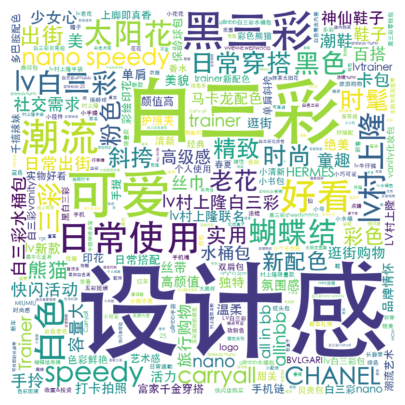

Enhanced TF-IDF score for '蝴蝶结' in 实用主义者: 0.00032921007196113814
Persona: 实用主义者


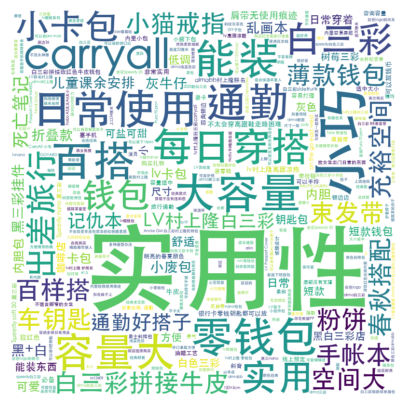

Enhanced TF-IDF score for '蝴蝶结' in 高端需求消费者: 0.002291273549867888
Persona: 高端需求消费者


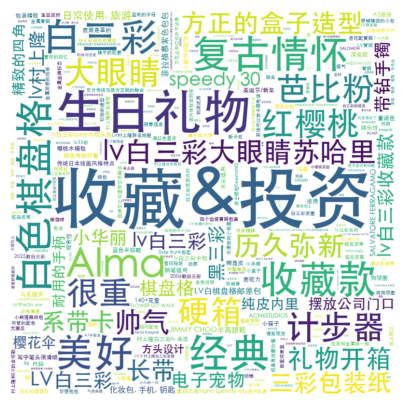

Enhanced TF-IDF score for '蝴蝶结' in 复古怀旧派: 0.00012834391494091427
Persona: 复古怀旧派


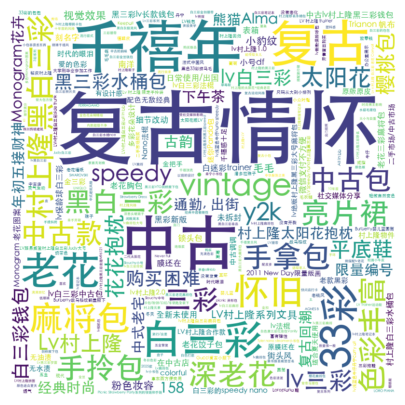

In [69]:
from collections import defaultdict, Counter
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Group words by persona
persona_words = defaultdict(list)  # Dictionary {persona: [list of all words]}
for i in ['潮流先锋', '实用主义者', '高端需求消费者', '复古怀旧派']:
    all_words = []
    for value in df[df['persona'] == i][cols].values.flatten():
        if isinstance(value, list):  # If value is a list, extend the list
            all_words.extend(value)
        elif isinstance(value, str):  # If value is a string, append it
            all_words.append(value)
    
    # Remove unwanted words like '未明确提及', '其他'
    all_words = [word for word in all_words if word not in ['未明确提及', '其他']]
    persona_words[i] = all_words

# Step 2: Calculate Total Word Frequencies Across All Personas
global_word_counts = Counter()  # Total occurrences of each word across all personas
for words in persona_words.values():
    global_word_counts.update(words)

total_words_global = sum(global_word_counts.values())  # Total words across all personas

# Step 3: Calculate Enhanced TF-IDF Scores for Each Persona
for persona, words in persona_words.items():
    # Term Frequency (TF) for the current persona
    term_frequencies = Counter(words)  # Word frequency within this persona
    total_words_persona = sum(term_frequencies.values())  # Total words in this persona

    # Calculate Enhanced TF-IDF Scores
    enhanced_tfidf_scores = {}
    for word, tf in term_frequencies.items():
        # Term frequency (normalized by persona total)
        tf_persona = tf / total_words_persona

        # Global frequency (how common this word is across all personas)
        global_frequency = global_word_counts[word] / total_words_global

        # IDF component: Penalize words that appear in many personas
        document_frequency = sum(1 for p_words in persona_words.values() if word in p_words)
        idf = np.log(1+len(persona_words) / (1 + document_frequency))

        # Local dominance factor: Relative importance of the word in the persona
        local_dominance = tf_persona / global_frequency if global_frequency > 0 else 0

        # Enhanced TF-IDF: Incorporate local dominance and IDF
        enhanced_tfidf_scores[word] = tf_persona * idf * local_dominance

    # Debugging: Print the enhanced TF-IDF score for a specific word (e.g., '蝴蝶结')
    if '蝴蝶结' in enhanced_tfidf_scores:
        print(f"Enhanced TF-IDF score for '蝴蝶结' in {persona}: {enhanced_tfidf_scores['蝴蝶结']}")
    
    # Step 4: Generate Word Cloud from Enhanced TF-IDF scores
    font_path = '/System/Library/Fonts/STHeiti Medium.ttc'  # Adjust path as needed
    wordcloud = WordCloud(
        font_path=font_path,  # Add your font path if necessary
        max_words=300,
        width=800, height=800,
        background_color='white'
    ).generate_from_frequencies(enhanced_tfidf_scores)
    
    # Display the word cloud
    print(f"Persona: {persona}")
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [46]:
#situation
def compute_stats(df,col,persona):
    temp = df[(df['persona'] == persona) & (df[col] != '未明确提及')].dropna(subset=col)
    return (temp.groupby(col).size()/len(temp))
for persona in df.persona.unique():
    if persona not in ['无法确定']:
        print(persona)
        # Call compute_stats to get the stats for the current persona
        stats = compute_stats(df, 'Style_Category', persona)
        # Create a separate plot for each persona
        plt.figure(figsize=(8, 5))  # Adjust figure size if needed
        stats.plot(kind="bar", color="skyblue", alpha=0.8)  # Bar plot for the persona
        
        # Add chart titles and labels for better readability
        plt.title(f"Distribution of Gender for Persona: {persona}")
        plt.ylabel("Percentage")
        plt.xlabel("Gender")
        plt.rcParams['font.sans-serif'] = ['Hei']
        
        # Show grid for better readability
        plt.grid(axis="y", linestyle='--', alpha=0.6)

        # Display the plot
        plt.show()

实用主义者


TypeError: unhashable type: 'list'

实用主义者


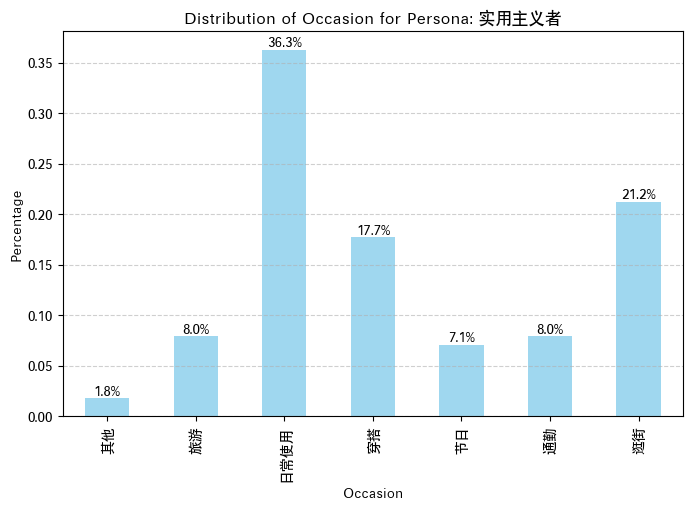

潮流先锋


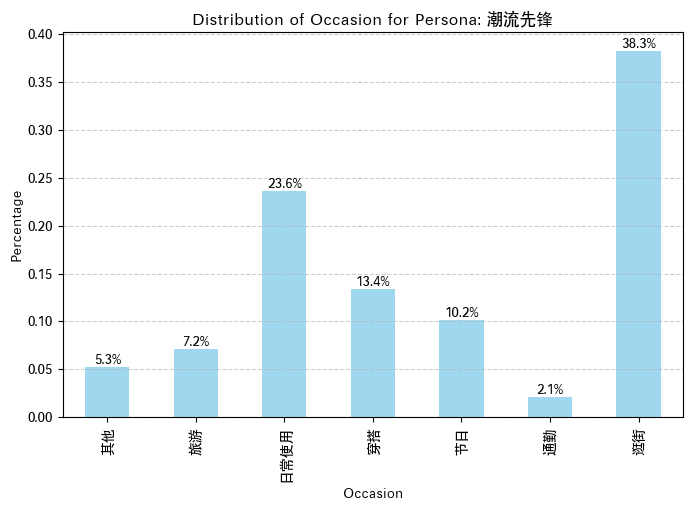

复古怀旧派


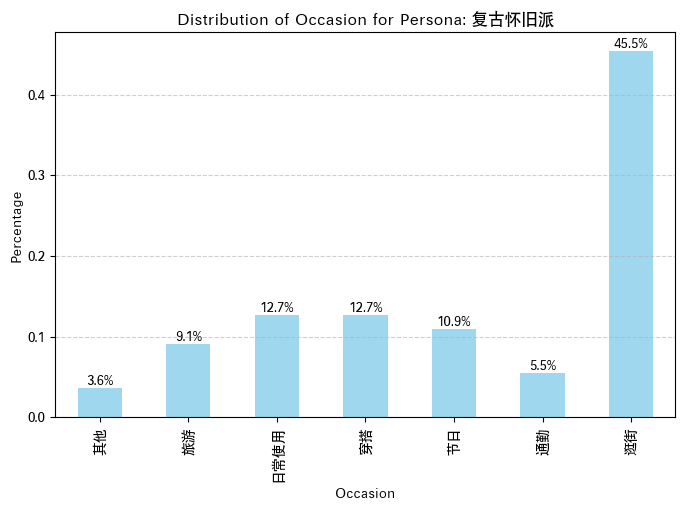

高端需求消费者


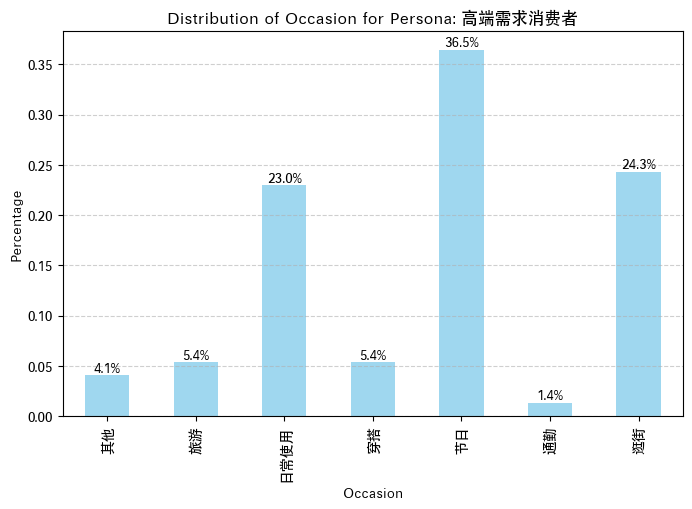

In [157]:
#situation
def compute_stats(df,col,persona):
    temp = df[(df['persona'] == persona) & (df[col] != '未明确提及')].dropna(subset=col)
    return (temp.groupby(col).size()/len(temp))
for persona in df.persona.unique():
    if persona not in ['无法确定']:
        print(persona)
        # Call compute_stats to get the stats for the current persona
        stats = compute_stats(df, 'Situation_Category', persona)
        # Create a separate plot for each persona
        plt.figure(figsize=(8, 5))  # Adjust figure size if needed
        stats.plot(kind="bar", color="skyblue", alpha=0.8)  # Bar plot for the persona
        
        # Add chart titles and labels for better readability
        plt.title(f"Distribution of Occasion for Persona: {persona}")
        plt.ylabel("Percentage")
        plt.xlabel("Occasion")
        plt.rcParams['font.sans-serif'] = ['Hei']
        for i, value in enumerate(stats):
            plt.text(i, value + 0.001, str(round(100 * value, 1)) + '%', ha='center', va='bottom', fontsize=10)
        # Show grid for better readability
        plt.grid(axis="y", linestyle='--', alpha=0.6)

        # Display the plot
        plt.show()

In [ ]:
def compute_stats(df,col,persona):
    temp = df[(df['persona'] == persona) & (df[col] != '未明确提及')].dropna(subset=col)
    return (temp.groupby(col).size()/len(temp))#.reindex(['逛街', '日常使用', '通勤', '节日', '穿搭', '其他', '旅游','其他'])
for persona in data_tagged.persona.unique():
    if persona not in ['无法确定']:
        # Call compute_stats to get the stats for the current persona
        stats = compute_stats(data_tagged, 'Element_Category', persona)
        # Create a separate plot for each persona
        plt.figure(figsize=(8, 5))  # Adjust figure size if needed
        stats.plot(kind="bar", color="skyblue", alpha=0.8)  # Bar plot for the persona
        
        # Add chart titles and labels for better readability
        plt.title(f"Distribution of Purpose_Category for Persona: {persona}")
        plt.ylabel("Percentage")
        plt.xlabel("Gender")
        
        # Show grid for better readability
        plt.grid(axis="y", linestyle='--', alpha=0.6)

        # Display the plot
        plt.show()

In [32]:
from collections import Counter, defaultdict
persona_words = defaultdict(list)  # Dictionary {persona: [list of all words]}
for i in ['潮流先锋', '实用主义者', '高端需求消费者', '复古怀旧派']:
    all_words = []
    for value in df[df['persona'] == i]['Product_Category'].values.flatten():
        if isinstance(value, list) :# If value is a list, extend the list
            all_words.extend(value)
    
    # Remove unwanted words like '未明确提及', '其他'
    all_words = [word for word in all_words if  word not in ['未明确提及', '其他']]
    persona_words[i] = all_words

# Step 2: Calculate Document Frequency (DF) for each word across personas
document_frequencies = Counter()  # Number of personas containing a word
for words in persona_words.values():  # For each persona's word list
    unique_words = set(words)  # Count each word only once per persona
    document_frequencies.update(unique_words)

# Total number of personas
num_personas = 4

# Step 3: Compute TF-IDF for each persona
for persona, words in persona_words.items():
    # Term Frequency (TF) for the current persona
    term_frequencies = Counter(words) 
    print(term_frequencies)

Counter({'speedy': 448, 'accessories': 192, 'carryall': 151, 'small leather goods': 146, 'side trunk': 73, 'all in bb': 62, 'neverfull': 29, 'other': 27, 'capucines': 21, 'accessorries': 15, 'suitcase': 4})
Counter({'speedy': 60, 'small leather goods': 48, 'carryall': 40, 'accessories': 22, 'all in bb': 11, 'other': 8, 'side trunk': 5, 'neverfull': 4, 'capucines': 4, 'suitcase': 2})
Counter({'speedy': 95, 'accessories': 28, 'small leather goods': 26, 'carryall': 17, 'capucines': 5, 'side trunk': 5, 'neverfull': 5, 'other': 3, 'all in bb': 3, 'suitcase': 2, 'accessorries': 1})
Counter({'speedy': 102, 'small leather goods': 46, 'carryall': 23, 'accessories': 22, 'side trunk': 9, 'neverfull': 7, 'other': 6, 'capucines': 5, 'all in bb': 5, 'suitcase': 2, 'accessorries': 2})


In [72]:
grouped_data = df[df.persona !='无法确定'].groupby('persona')['Product_Category'].apply(lambda x: sum(x, []))  # Merge all lists of words within personas

# Step 2: Count occurrences of each word per persona
# For each persona, count words using Counter
word_counts = grouped_data.apply(Counter)

# Convert the word counts to a DataFrame, where rows = personas, cols = words
term_frequency_matrix = pd.DataFrame(word_counts.tolist(), index=grouped_data.index).fillna(0)

words_to_exclude = ['未明确提及','其他','other']  # Example: words you want to exclude
term_frequency_matrix = term_frequency_matrix.drop(columns=words_to_exclude, errors='ignore')

# Step 3: Compute the Term Frequencies (TF) for each persona
tf = term_frequency_matrix.div(term_frequency_matrix.sum(axis=1), axis=0)  # Normalize word counts by row sum (persona total)

# Step 4: Compute the average term frequency of each word across all personas
avg_tf = tf.mean(axis=0)  # Average TF per word across all personas

# Step 5: Compute the Relative Scores
rel_scores = tf.div(avg_tf, axis=1)  # Divide TF by avg TF for each word (element-wise)

# Step 6: Normalize scores within each persona (to ensure scores sum to 1 per persona)
normalized_scores = rel_scores.div(rel_scores.sum(axis=1), axis=0)
rel_scores

small leather goods  accessories    speedy  capucines  carryall  \
persona                                                                    
复古怀旧派               1.148907     0.773756  1.099398   1.019478  0.777718   
实用主义者               1.364009     0.806983  0.735791   0.927933  1.538875   
潮流先锋                0.712687     1.304315  0.943739   0.836848  0.997908   
高端需求消费者             0.774397     1.114947  1.221072   1.215741  0.685499   

         neverfull  side trunk  suitcase  all in bb  
persona                                              
复古怀旧派     1.207864    1.030968  1.074935   0.602223  
实用主义者     0.785288    0.651660  1.223013   1.507401  
潮流先锋      0.977996    1.634348  0.420176   1.459480  
高端需求消费者   1.028853    0.683024  1.281875   0.430895

In [67]:
normalized_scores.to_excel('persona_top_products.xlsx')

实用主义者


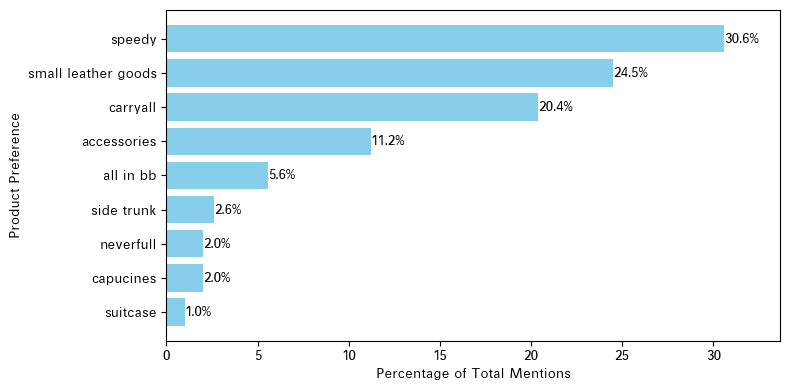

潮流先锋


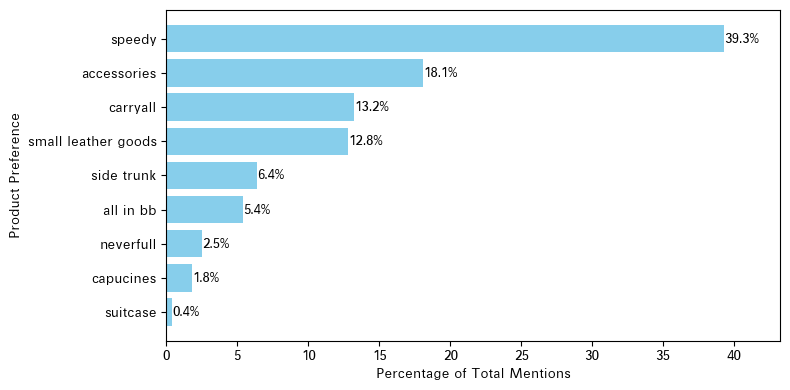

无法确定


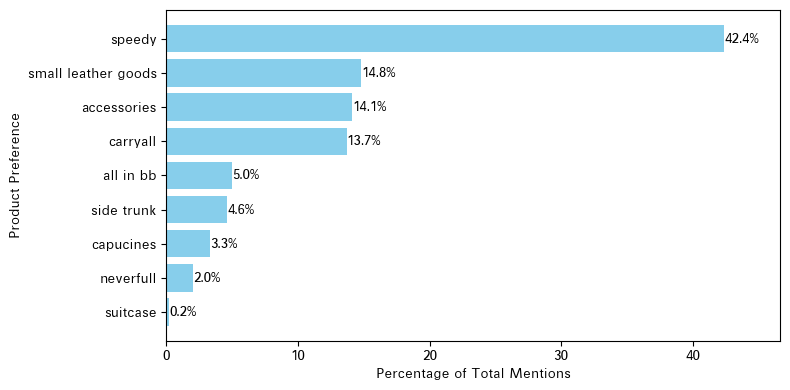

复古怀旧派


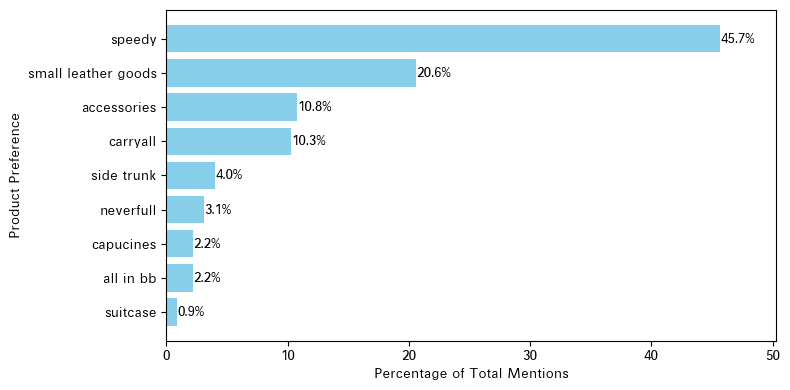

高端需求消费者


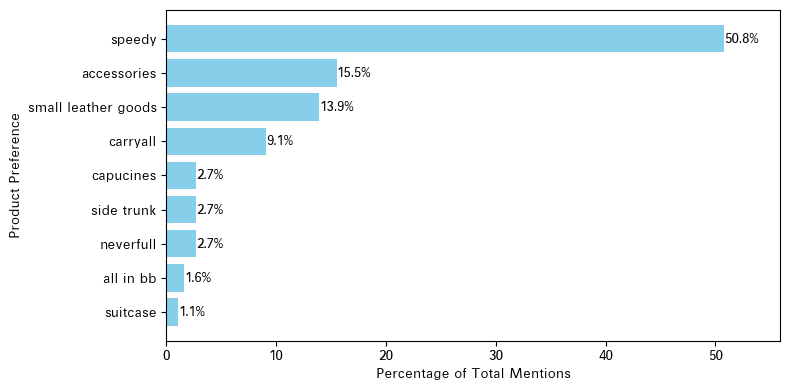

In [160]:
def count_col_list(df,col):
    dict_cnt = {}
    total = [j for i in df[col] for j in i if j not in (['其他','未明确提及','other'])]
    counter = Counter(total)
    for k,v in counter.items():
        dict_cnt[k] = round(v/len(total)*100,1)
    return dict_cnt
def get_top_n(dictionary,n=10):
    return Counter(dictionary).most_common(n)
def plot_top_n(counter):
    labels, counts = zip(*counter) 
    plt.figure(figsize=(8, 4))  # Set the figure size
    plt.barh(labels, counts, color='skyblue')  # Create a horizontal bar plot
    plt.rcParams['font.sans-serif'] = ['Hei']
    # Step 5: Add labels and title
    plt.xlabel('Percentage of Total Mentions')  # Add x-axis label
    plt.ylabel('Product Preference')  # Add y-axis label
    #plt.title('Word Frequency')  # Add title
    for i, value in enumerate(counts):
        plt.text(
            value + 0.005,  # X-coordinate: Slightly beyond the bar width
            i,  # Y-coordinate: Center at the bar (index position)
            f'{value}%',  # Text to display (percentage with % symbol)
            va='center',  # Vertically align text at the center of the bar
            ha='left',  # Horizontally align text to the left
            fontsize=10  # Font size of the text
        )
    # Step 6: Show the bar plot
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency on top
    max_value = max(counts)
    plt.xlim([0, max_value * 1.1]) 
    plt.tight_layout()
    plt.show()
for persona in df.persona.unique():
    print(persona)
    plot_top_n(get_top_n(count_col_list(df[df.persona == persona],'Product_Category'),10))

In [14]:
df.columns

Index(['内容', 'raw_tagging', 'parsed_json', 'Age_Range', 'Gender', 'City_Tier',
       'Purchase_Purpose', 'Purchase_Situation', 'Product_Mention',
       'Competitor', 'Keywords_Design_Elements', 'Keywords_Design_Style',
       'Keywords_Functionality', 'Keywords_Other', 'Emotion', 'Past_Purchase',
       'Tone', 'Purpose_Category', 'Situation_Category', 'Emotion_Category',
       'Style_Category', 'Functionality_Category', 'Element_Category',
       'Product_Category', 'Competitor_Category', 'persona'],
      dtype='object')

In [78]:
categories={}
categories['City_Tier'] = ['一线','二线','三线及以下']
categories['Gender'] = ['女性','男性']
categories['Age_Range'] = ['18岁以下','18-24岁','25-34岁','35-44岁','45岁以上']

In [81]:
col_demo = ['Age_Range', 'Gender', 'City_Tier']
def compute_stats(df,col,persona):
    temp = df[df['persona'] == persona].dropna(subset=col)
    return (temp.groupby(col).size()/len(temp)).reindex(categories[col], fill_value=0)
stats_dict = {}
for persona in df.persona.unique():
    col_stats = {}
    for col in col_demo:
        if persona not in ['无法确定']:
            # Call compute_stats to get the stats for the current persona
            stats = compute_stats(df, col, persona)
            col_stats[col] = stats.to_dict()
    stats_dict[persona] = col_stats

In [82]:
stats_dict

{'实用主义者': {'Age_Range': {'18岁以下': 0.0,
   '18-24岁': 0.7777777777777778,
   '25-34岁': 0.18888888888888888,
   '35-44岁': 0.022222222222222223,
   '45岁以上': 0.011111111111111112},
  'Gender': {'女性': 0.957983193277311, '男性': 0.04201680672268908},
  'City_Tier': {'一线': 0.7575757575757576,
   '二线': 0.24242424242424243,
   '三线及以下': 0.0}},
 '潮流先锋': {'Age_Range': {'18岁以下': 0.002512562814070352,
   '18-24岁': 0.2814070351758794,
   '25-34岁': 0.7010050251256281,
   '35-44岁': 0.01507537688442211,
   '45岁以上': 0.0},
  'Gender': {'女性': 0.9893778452200304, '男性': 0.010622154779969651},
  'City_Tier': {'一线': 0.9138576779026217,
   '二线': 0.07865168539325842,
   '三线及以下': 0.00749063670411985}},
 '无法确定': {},
 '复古怀旧派': {'Age_Range': {'18岁以下': 0.0,
   '18-24岁': 0.056818181818181816,
   '25-34岁': 0.32954545454545453,
   '35-44岁': 0.3522727272727273,
   '45岁以上': 0.26136363636363635},
  'Gender': {'女性': 0.9855072463768116, '男性': 0.014492753623188406},
  'City_Tier': {'一线': 0.84375, '二线': 0.15625, '三线及以下': 0.0}},
 

In [84]:

with open("persona_demographic.json", "w", encoding="utf-8") as file:
    json.dump(stats_dict, file, indent=4, ensure_ascii=False)


In [19]:
col_demo = ['Age_Range', 'Gender', 'City_Tier','persona']
df_demo = df[df.persona !='无法确定'][col_demo]
def replace_nan(obj):
    if isinstance(obj, dict):
        return {k: replace_nan(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [replace_nan(x) for x in obj]
    elif isinstance(obj, float) and np.isnan(obj):
        return None
    return obj

# Replace NaN with None
cleaned_data = replace_nan(df_demo)

# Save to JSON
with open("persona_demographic.json", "w", encoding="utf-8") as file:
    json.dump(cleaned_data, file, indent=4)


TypeError: Object of type DataFrame is not JSON serializable

In [21]:
df_demo.to_excel('persona_demographic.xlsx',index = False)

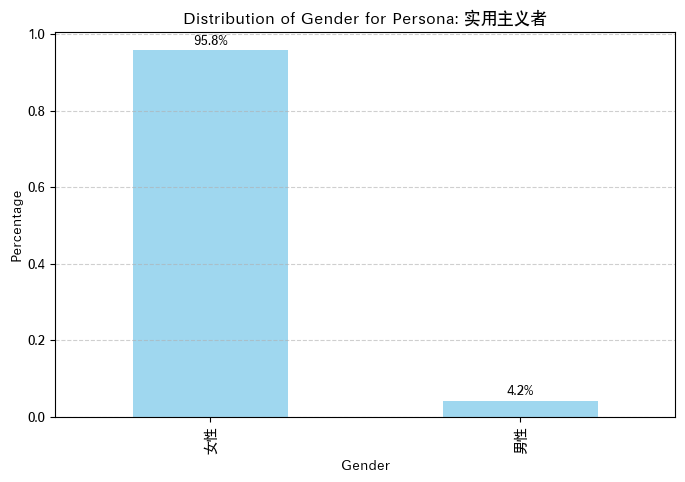

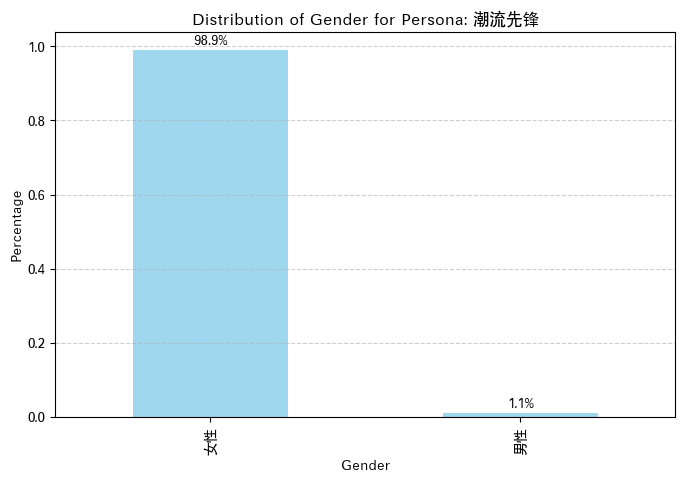

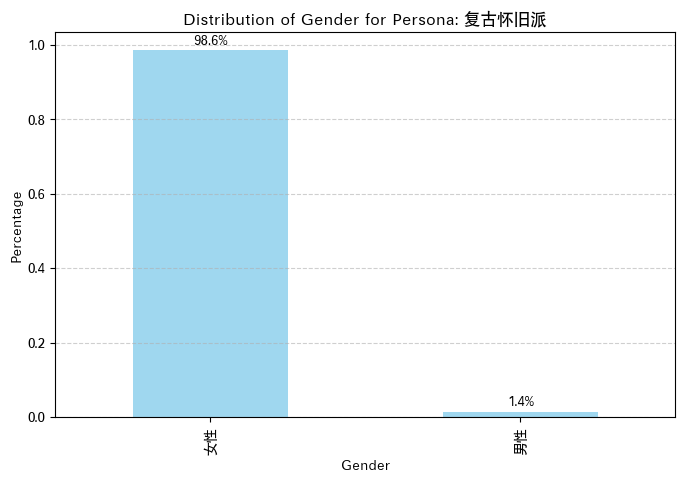

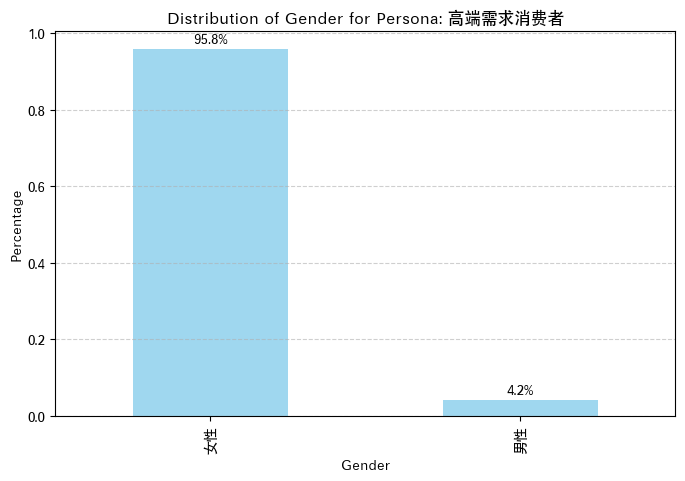

In [139]:
#City tier
#age range
def compute_stats(df,col,persona):
    temp = df[df['persona'] == persona].dropna(subset=col)
    return (temp.groupby(col).size()/len(temp))#.reindex(['一线','二线','三线及以下'])
for persona in df.persona.unique():
    if persona not in ['无法确定']:
        # Call compute_stats to get the stats for the current persona
        stats = compute_stats(df, 'Gender', persona)
        # Create a separate plot for each persona
        plt.figure(figsize=(8, 5))  # Adjust figure size if needed
        ax = stats.plot(kind="bar", color="skyblue", alpha=0.8)  # Bar plot for the persona
        for i, value in enumerate(stats):
            plt.text(i, value + 0.01, str(round(100 * value, 1)) + '%', ha='center', va='bottom', fontsize=10)
        
        
        # Add chart titles and labels for better readability
        plt.title(f"Distribution of Gender for Persona: {persona}")
        plt.ylabel("Percentage")
        plt.xlabel("Gender")
        
        # Show grid for better readability
        plt.grid(axis="y", linestyle='--', alpha=0.6)

        # Display the plot
        plt.show()

posx and posy should be finite values
posx and posy should be finite values


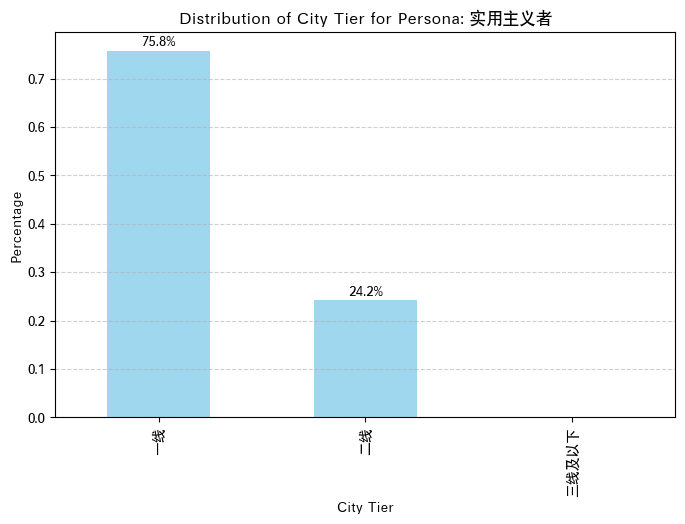

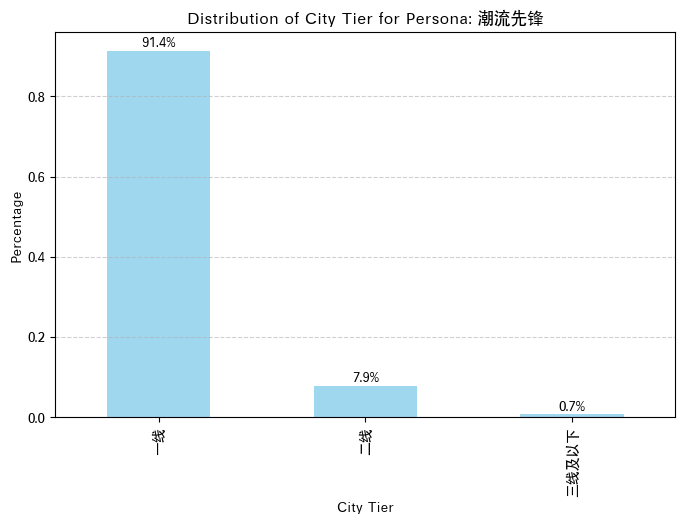

posx and posy should be finite values
posx and posy should be finite values


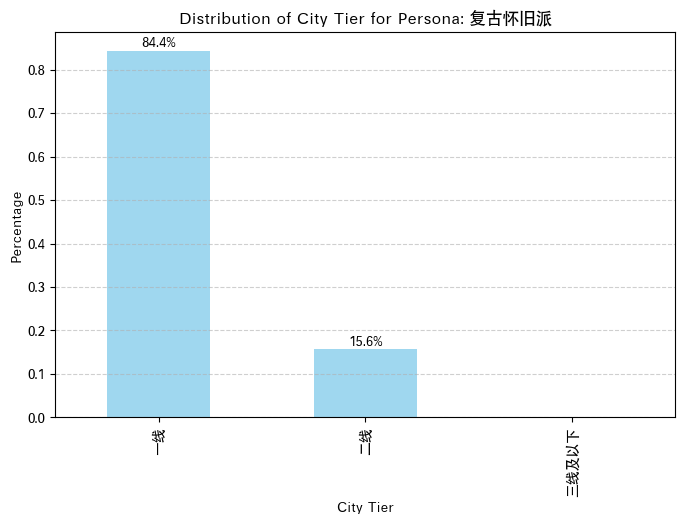

posx and posy should be finite values
posx and posy should be finite values


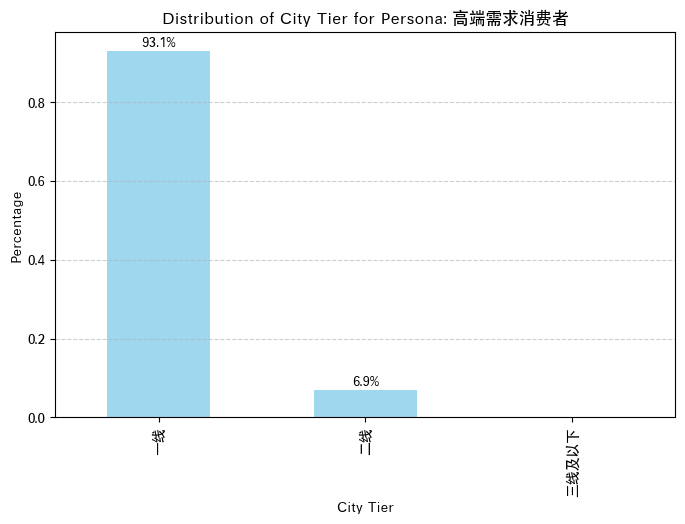

In [141]:
#City tier
#age range
def compute_stats(df,col,persona):
    temp = df[df['persona'] == persona].dropna(subset=col)
    return (temp.groupby(col).size()/len(temp)).reindex(['一线','二线','三线及以下'])
for persona in df.persona.unique():
    if persona not in ['无法确定']:
        # Call compute_stats to get the stats for the current persona
        stats = compute_stats(df, 'City_Tier', persona)
        # Create a separate plot for each persona
        plt.figure(figsize=(8, 5))  # Adjust figure size if needed
        stats.plot(kind="bar", color="skyblue", alpha=0.8)  # Bar plot for the persona
        for i, value in enumerate(stats):
            plt.text(i, value + 0.005, str(round(100 * value, 1)) + '%', ha='center', va='bottom', fontsize=10)
        
        # Add chart titles and labels for better readability
        plt.title(f"Distribution of City Tier for Persona: {persona}")
        plt.ylabel("Percentage")
        plt.xlabel("City Tier")
        
        # Show grid for better readability
        plt.grid(axis="y", linestyle='--', alpha=0.6)

        # Display the plot
        plt.show()

posx and posy should be finite values
posx and posy should be finite values


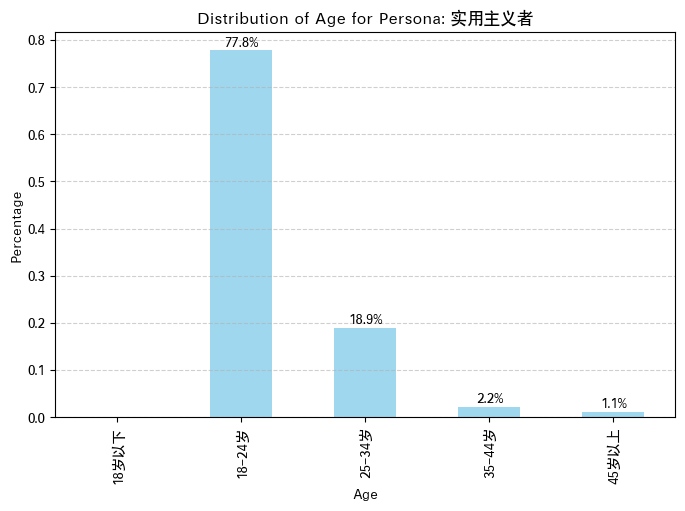

posx and posy should be finite values
posx and posy should be finite values


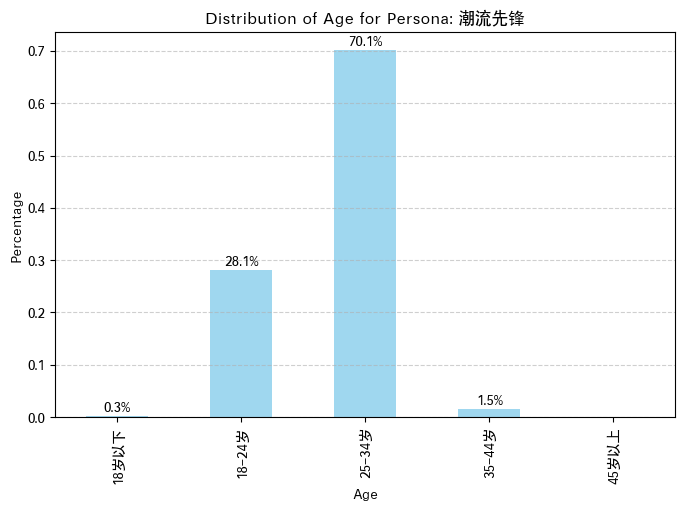

posx and posy should be finite values
posx and posy should be finite values


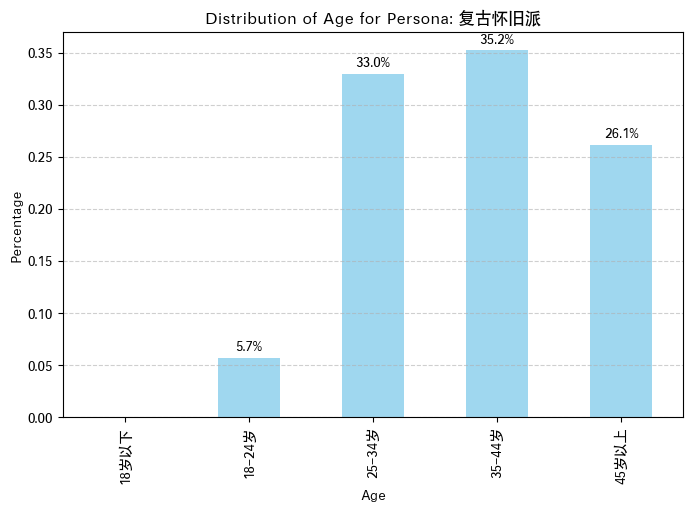

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


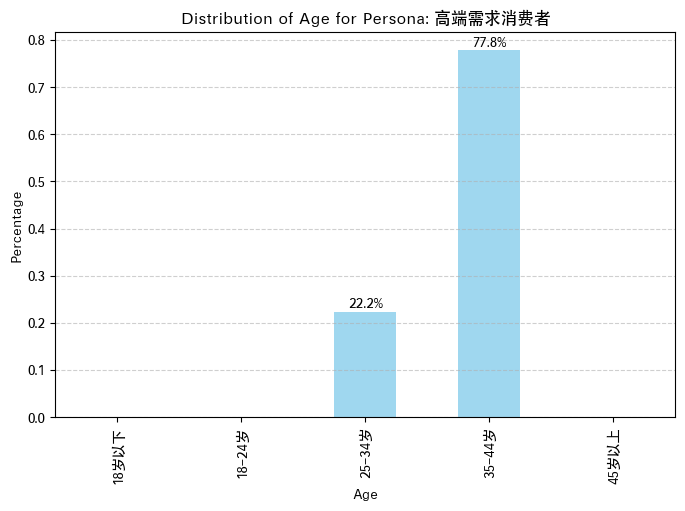

In [142]:
#age range
def compute_stats(df,col,persona):
    temp = df[df['persona'] == persona].dropna(subset=col)
    return (temp.groupby(col).size()/len(temp)).reindex(['18岁以下','18-24岁','25-34岁','35-44岁','45岁以上'])
for persona in df.persona.unique():
    if persona not in ['无法确定']:
        # Call compute_stats to get the stats for the current persona
        stats = compute_stats(df, 'Age_Range', persona)
        # Create a separate plot for each persona
        plt.figure(figsize=(8, 5))  # Adjust figure size if needed
        stats.plot(kind="bar", color="skyblue", alpha=0.8)  # Bar plot for the persona
        for i, value in enumerate(stats):
            plt.text(i, value + 0.005, str(round(100 * value, 1)) + '%', ha='center', va='bottom', fontsize=10)
        # Add chart titles and labels for better readability
        plt.title(f"Distribution of Age for Persona: {persona}")
        plt.ylabel("Percentage")
        plt.xlabel("Age")
        
        # Show grid for better readability
        plt.grid(axis="y", linestyle='--', alpha=0.6)

        # Display the plot
        plt.show()

实用主义者


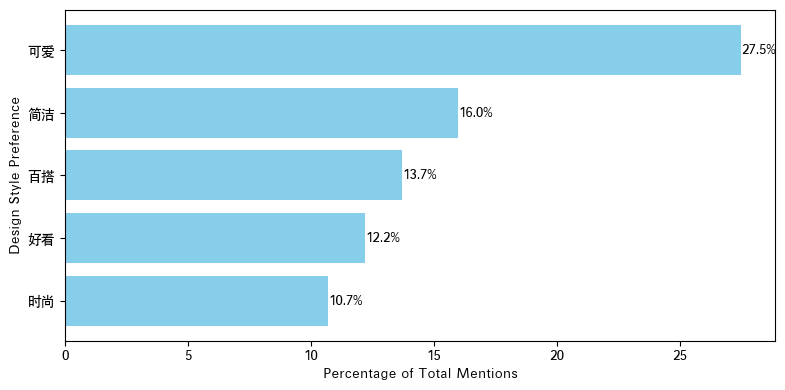

潮流先锋


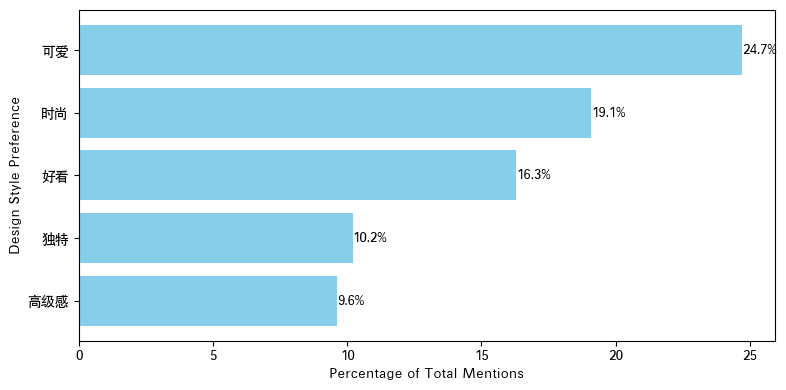

无法确定


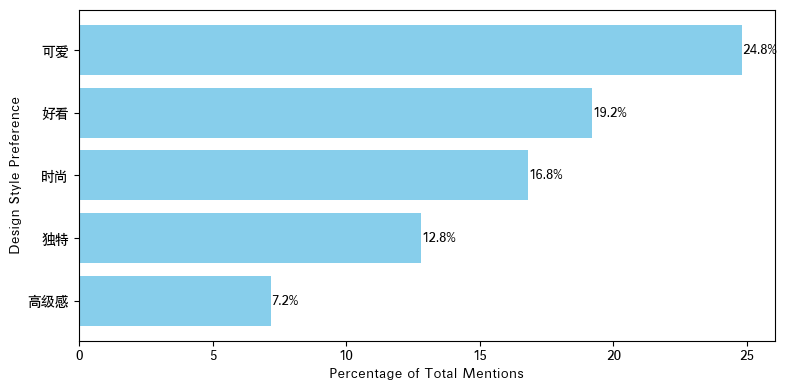

复古怀旧派


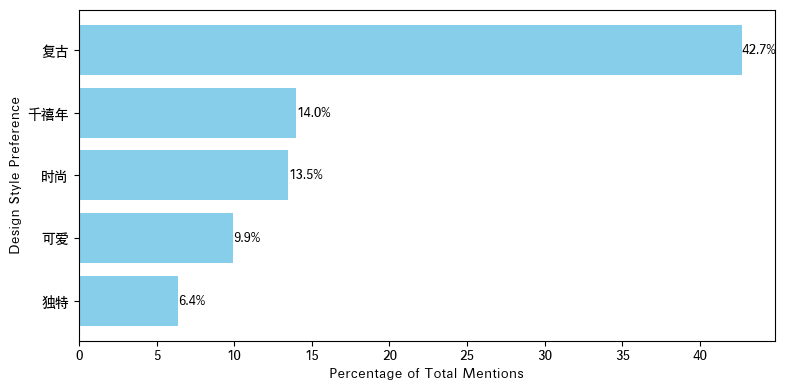

高端需求消费者


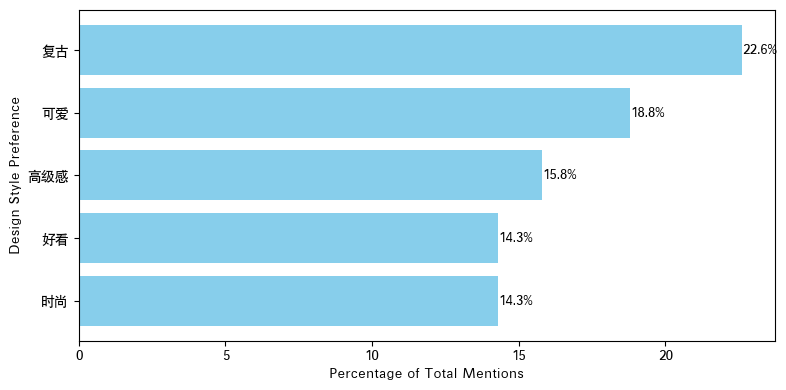

In [152]:
#style
def count_col_list(df,col):
    dict_cnt = {}
    total = [j for i in df[col] for j in i if j not in (['其他','未明确提及','other'])]
    counter = Counter(total)
    for k,v in counter.items():
        dict_cnt[k] = round(v/len(total)*100,1)
    return dict_cnt
def get_top_n(dictionary,n=10):
    return Counter(dictionary).most_common(n)
def plot_top_n(counter):
    labels, counts = zip(*counter) 
    plt.figure(figsize=(8, 4))  # Set the figure size
    plt.barh(labels, counts, color='skyblue')  # Create a horizontal bar plot
    plt.rcParams['font.sans-serif'] = ['Hei']
    for i, value in enumerate(counts):
        plt.text(
            value + 0.005,  # X-coordinate: Slightly beyond the bar width
            i,  # Y-coordinate: Center at the bar (index position)
            f'{value}%',  # Text to display (percentage with % symbol)
            va='center',  # Vertically align text at the center of the bar
            ha='left',  # Horizontally align text to the left
            fontsize=10  # Font size of the text
        )
    # Step 5: Add labels and title
    plt.xlabel('Percentage of Total Mentions')  # Add x-axis label
    plt.ylabel('Design Style Preference')  # Add y-axis label
    #plt.title('Word Frequency')  # Add title
    # Step 6: Show the bar plot
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency on top
    plt.tight_layout()
    plt.show()
for persona in df.persona.unique():
    print(persona)
    plot_top_n(get_top_n(count_col_list(df[df.persona == persona],'Style_Category'),5))

In [77]:
dict = {"推荐产品":"```markdown\n## 推荐产品\n\n### 1. 村上隆系列手袋推荐\n\n- **产品编号**: M13089\n- **产品名称**: LV x TM ALL IN BB 手袋\n- **推荐理由**: 该款手袋采用Monogram涂层帆布，呈现斑斓的彩虹色调，具有多种携带方式（手提、肩背和斜挎），非常实用。虽然价格略高于客户的偏好区间，但其多功能性和独特的设计使其成为一款值得投资的产品。\n- **核心卖点关键词**: 实用性, 多功能, 玩趣格调\n- **搭配建议**: 该手袋的颜色和设计充满活力，适合日常使用，可以搭配简约风格的服装和配饰，形成鲜明对比。\n\n### 2. 配饰推荐\n\n- **产品编号**: Q05173\n- **产品名称**: Silver Lockit X Doudou Louis 手链，925银与绳带\n- **推荐理由**: 该手链是客户之前购买过的商品，已经证明了其对这类简约且实用型配饰的喜爱。这款手链设计简洁，适合日常佩戴，且价格适中，符合客户的预算。\n- **核心卖点关键词**: 简约, 实用, 时尚\n- **搭配建议**: 该手链可以与村上隆系列的手袋和其他配件搭配，增添整体造型的精致感。\n\n### 3. 服装推荐\n\n- **产品编号**: 无\n- **产品名称**: 无\n- **推荐理由**: 由于知识库中没有提供具体的服装产品信息，建议选择LV的经典款T恤或衬衫，这些款式通常简洁大方，适合日常穿着，且易于搭配。\n- **核心卖点关键词**: 简约, 舒适, 百搭\n- **搭配建议**: 选择一款简洁的T恤或衬衫，可以与村上隆系列的手袋和手链形成良好的搭配，打造休闲而有品味的造型。\n\n### 4. 鞋履推荐\n\n- **产品编号**: 无\n- **产品名称**: 无\n- **推荐理由**: 由于知识库中没有提供具体的鞋履产品信息，建议选择LV的经典款运动鞋或休闲鞋，这些款式舒适且适合多种场合，非常适合实用主义者的需求。\n- **核心卖点关键词**: 舒适, 时尚, 实用\n- **搭配建议**: 选择一双舒适的运动鞋或休闲鞋，可以与村上隆系列的手袋和其他配件搭配，增加整体造型的休闲感和实用性。\n\n### 总结\n\n以上推荐的产品均考虑了客户的实用主义需求，注重产品的实用性和性价比。通过选择多用途背包、简约钱包和实用型配饰，以及合适的服装和鞋履，可以满足客户的日常使用需求，并形成完整的搭配方案。\n```","用户画像":"```markdown\n## 客户信息\n\n- **客户代码**: 89de41b945e71c0d1ee674f27ab94f87\n- **生日**: 1996-03-20\n- **年龄**: 27岁 (根据当前年份2023计算)\n- **性别**: 2 (假设为男性，具体需要根据业务定义)\n- **最近一次购买时间**: 2022-09-12 19:17:30\n- **历史购买总商品数**: 0\n- **历史购买总金额**: 2950元\n- **历史购买商品集合**: Silver Lockit X Doudou Louis 手链，925银与绳带\n- **客户类型**: ADVENTURERS\n\n## Persona分类及理由\n\n根据该客户的消费行为和个人特征，将其归类到最匹配的Persona类别为：**实用主义者**。\n\n### 分类理由：\n- **消费行为**: 该客户的历史购买总商品数为0，但有购买记录，说明其在选择商品时可能更加注重实际需求和性价比。虽然只购买了一件商品，但这件商品是手链，属于配饰类，这符合实用主义者的偏好。\n- **价格偏好**: 历史购买总金额为2950元，处于较低的价格区间，这也符合实用主义者的价格偏好（<10000）。\n- **客户类型**: 客户类型为ADVENTURERS，可能意味着该客户更倾向于选择功能性较强的商品以满足日常使用需求，这也与实用主义者的描述相吻合。\n\n### Persona内容\n\n#### 实用主义者\n- **描述**: 注重产品的实用性和性价比，主要选择功能性较强的商品如包袋和配件，以满足日常使用需求。他们关注商品的容量、背法多样性及搭配方便。\n- **通用产品偏好**: [\"多用途背包\", \"简约钱包\", \"实用型配饰\"]\n- **价格偏好**: <10000\n- **沟通关键词**: [\"实用性\", \"多功能\", \"性价比\"]\n\n```","用户ID":"89de41b945e71c0d1ee674f27ab94f87"}

In [105]:
from utils.chatbot_app_dialog_streamlit import QWENapp 
tagbot = QWENapp()
tagbot.ask("cb0ba0cba88fdfc33fa2a11bbd97ce0c")

request_id=17d57552-cd88-99bb-accf-2b8e36c72f44
code=500
message={"nodeName":"村上隆新品信息","errorInfo":"知识库节点执行失败:获取知识库详情信息失败","nodeId":"Retrieval_FY50"}
请参考文档：https://help.aliyun.com/zh/model-studio/developer-reference/error-code


In [98]:
def json_to_markdown(data):
    """
    Transforms the given JSON structure into a Markdown-formatted string.
    
    Args:
        data (dict): The input JSON object with the specified structure.
    
    Returns:
        str: The resulting Markdown string.
    """
    # Convert the dictionary to Markdown
    markdown = []
    
    # Add customer code
    markdown.append(f"# 客户代码: {data.get('cust_code', 'N/A')}\n")
    
    # Basic Information
    markdown.append("## 基本信息")
    basic_info = data.get("基本信息", {})
    markdown.append(f"- **性别**: {basic_info.get('性别', 'N/A')}")
    markdown.append(f"- **年龄**: {basic_info.get('年龄', 'N/A')}")
    markdown.append(f"- **客户类型**: {basic_info.get('客户类型', 'N/A')}\n")
    
    # History of purchased items
    markdown.append("## 历史购买过的商品")
    purchased_items = data.get("历史购买过的商品", "N/A")
    if isinstance(purchased_items, list):
        markdown.extend([f"- {item}" for item in purchased_items])  # Add each item as a bullet point
    else:
        markdown.append(f"- {purchased_items}\n")
    
    # Total spending
    markdown.append("## 历史消费总金额")
    markdown.append(f"- {data.get('历史消费总金额', 'N/A')}\n")

    # Last purchase time
    markdown.append("## 最近一次购买时间")
    markdown.append(f"- {data.get('最近一次购买时间', 'N/A')}\n")
    
    # Total items purchased
    markdown.append("## 历史总购买物品数")
    markdown.append(f"- {data.get('历史总购买物品数', 'N/A')}")
    
    # Join all lines into a single Markdown string
    return "\n".join(markdown)

In [103]:
outputtext = '{"推荐产品":"```json\\n{\\n  \\"客户 Persona\\": \\"高端需求消费者\\",\\n  \\"推荐产品\\": [\\n    {\\n      \\"产品编号\\": \\"M13105\\",\\n      \\"产品名称\\": \\"LV x TM CARRYALL VIBE 手袋\\",\\n      \\"推荐理由\\": \\"这款手袋采用了柔软羊皮革，设计上融入了村上隆标志性的Monogram图案，展现了品牌传承与创新的完美结合。其宽敞的设计适合日常使用，能够满足您对实用性和时尚感的双重追求。\\",\\n      \\"核心卖点\\": \\"Monogram图案, 柔软羊皮革, 可拆卸内袋, 实用性与时尚感并存\\",\\n      \\"搭配建议\\": \\"这款手袋可以搭配休闲装或商务装，非常适合现代都市男性。接下来推荐的三款产品将与这款手袋形成风格互补，打造整体协调的造型。\\"\\n    },\\n    {\\n      \\"产品编号\\": \\"M62630\\",\\n      \\"产品名称\\": \\"6匙钥匙包\\",\\n      \\"推荐理由\\": \\"这款6匙钥匙包是LV的经典配饰之一，采用Monogram帆布材质，小巧精致且实用。它不仅能够方便地管理您的钥匙，还能作为一款时尚的配饰，增添您的整体造型感。\\",\\n      \\"核心卖点\\": \\"经典Monogram帆布, 小巧实用, 时尚配饰\\",\\n      \\"搭配建议\\": \\"这款钥匙包可以轻松挂在LV x TM CARRYALL VIBE 手袋的肩带上，既方便取用又增加了层次感。\\"\\n    },\\n    {\\n      \\"产品编号\\": \\"M70489\\",\\n      \\"产品名称\\": \\"LV ARCHLIGHT 运动鞋\\",\\n      \\"推荐理由\\": \\"这款LV ARCHLIGHT运动鞋以其独特的设计和舒适的穿着体验而闻名。白色鞋面搭配Monogram细节，简约而不失时尚感，适合各种场合穿着。\\",\\n      \\"核心卖点\\": \\"独特设计, 舒适穿着, Monogram细节, 多场合适用\\",\\n      \\"搭配建议\\": \\"这款运动鞋可以与LV x TM CARRYALL VIBE 手袋和6匙钥匙包形成完美的休闲装扮，适合周末出行或日常通勤。\\"\\n    },\\n    {\\n      \\"产品编号\\": \\"M70312\\",\\n      \\"产品名称\\": \\"LV DENIM JACKET 牛仔夹克\\",\\n      \\"推荐理由\\": \\"这款LV DENIM JACKET牛仔夹克采用优质牛仔布料，搭配Monogram贴花，展现出品牌的经典与时尚。无论是搭配休闲裤还是牛仔裤，都能彰显您的个性和品味。\\",\\n      \\"核心卖点\\": \\"优质牛仔布料, Monogram贴花, 经典与时尚并存, 百搭款式\\",\\n      \\"搭配建议\\": \\"这款牛仔夹克可以与LV x TM CARRYALL VIBE 手袋、6匙钥匙包和LV ARCHLIGHT运动鞋一起，打造出一个充满活力和时尚感的休闲造型。\\"\\n    }\\n  ]\\n}\\n```","用户画像":"```json\\n{\\n  \\"cust_code\\": \\"cb0ba0cba88fdfc33fa2a11bbd97ce0c\\",\\n  \\"基本信息\\": {\\n    \\"性别\\": \\"男\\",\\n    \\"年龄\\": 31,\\n    \\"客户类型\\": \\"THE FAMILY\\"\\n  },\\n  \\"历史购买过的商品\\": \\"6匙钥匙包, LV MADE SQUARED POUCH 包饰, KEEPALL BANDOULIÈRE 50 旅行袋\\",\\n  \\"历史消费总金额\\": 34150,\\n  \\"最近一次购买时间\\": \\"2022-12-22 17:42:45\\",\\n  \\"历史总购买物品数\\": 3\\n}\\n```\\n\\n```json\\n{\\n  \\"Persona\\": \\"高端需求消费者\\",\\n  \\"分类理由\\": {\\n    \\"历史购买\\": \\"该客户购买了包括旅行袋在内的经典款式手袋，这表明他倾向于选择具有品牌传承和设计价值的商品。\\",\\n    \\"消费金额\\": \\"客户的总消费金额为34150元，接近并符合高端需求消费者的消费水平（30000-50000）。\\",\\n    \\"客户群体\\": \\"作为\'THE FAMILY\'类型的客户，他可能更注重品牌的经典设计和文化传承，适合归类为高端需求消费者。\\"\\n  }\\n}\\n```","用户ID":"cb0ba0cba88fdfc33fa2a11bbd97ce0c"}'
list_info = []
for i in json.loads(outputtext)["用户画像"].split('\n\n'):
    i = i.strip('\n').replace('```json', '').replace('```', '').strip()
    list_info.append(json.loads(i))
cust_info = list_info[0]
cust_persona = list_info[1]
cust_info

{'cust_code': 'cb0ba0cba88fdfc33fa2a11bbd97ce0c',
 '基本信息': {'性别': '男', '年龄': 31, '客户类型': 'THE FAMILY'},
 '历史购买过的商品': '6匙钥匙包, LV MADE SQUARED POUCH 包饰, KEEPALL BANDOULIÈRE 50 旅行袋',
 '历史消费总金额': 34150,
 '最近一次购买时间': '2022-12-22 17:42:45',
 '历史总购买物品数': 3}

# 客户代码: cb0ba0cba88fdfc33fa2a11bbd97ce0c\n\n## 基本信息\n- **性别**: 男\n- **年龄**: 31\n- **客户类型**: THE FAMILY\n\n## 历史购买过的商品\n- 6匙钥匙包, LV MADE SQUARED POUCH 包饰, KEEPALL BANDOULIÈRE 50 旅行袋\n\n## 历史消费总金额\n- 34150\n\n## 最近一次购买时间\n- 2022-12-22 17:42:45\n\n## 历史总购买物品数\n- 3

In [107]:
dup = pd.read_excel('duplicates.xlsx')
dup.drop_duplicates(subset =['cust_code','item_code','order_code'],inplace = True)
dup

order_code                         cust_code order_chn_l1 store_code  \
0     nvo542322943  058a300e4b16eacf3d6a3b35b2e64114          ECO        NEZ   
1     nvo542361049  058a300e4b16eacf3d6a3b35b2e64114          ECO        NEZ   
3     nvo542305055  9d51d7abc6517fca3d18bbadfb2eff8a          ECO        NEZ   
5     nvo541455885  bb31c7684c715170e91cfb28d105f362          ECO        NEZ   
6     nvo541395649  bb31c7684c715170e91cfb28d105f362          ECO        NEZ   
..             ...                               ...          ...        ...   
299  5134005006207  41e89431f9bf5a48e9158d7bb46d5c1d       RETAIL        NY1   
300  5134019000233  41e89431f9bf5a48e9158d7bb46d5c1d       RETAIL        NU8   
301  5134006007760  41e89431f9bf5a48e9158d7bb46d5c1d       RETAIL        NU8   
302  5108008002073  41e89431f9bf5a48e9158d7bb46d5c1d       RETAIL        NU8   
303  5134007006558  41e89431f9bf5a48e9158d7bb46d5c1d       RETAIL        NU8   

    emp_code              order_time recvr_prv_name recvr_city_name  \
0         \N 2024-01-02 15:35:35.824             GD             韶关市   
1         \N 2024-01-02 17:44:34.174             GD             韶关市   
3         \N 2024-01-02 11:47:47.046             HN             长沙市   
5         \N 2023-12-06 22:48:01.718             GD             深圳市   
6         \N 2023-12-06 22:47:58.208             GD             深圳市   
..       ...                     ...            ...             ...   
299      WWV 2023-05-20 02:25:52.763             \N        HANGZHOU   
300     SL0H 2024-09-13 19:07:54.059             \N        Hangzhou   
301     TW07 2024-02-23 01:36:50.655             \N        HANGZHOU   
302      WWV 2022-02-16 01:29:54.363             \N        Hangzhou   
303     RG03 2024-03-31 22:05:10.403             \N        HANGZHOU   

    order_status item_code  ... pay_price  net_pay_amt          create_time  \
0      fulfilled    M45958  ...     29350        29350  2024-01-02 00:00:00   
1      fulfilled    M46583  ...     22300        22300  2024-01-02 00:00:00   
3      fulfilled    M41177  ...     14400        14400  2024-01-02 00:00:00   
5      fulfilled    M9043T  ...      5000         5000  2023-12-06 00:00:00   
6      fulfilled    M9043U  ...      4500         4500  2023-12-06 00:00:00   
..           ...       ...  ...       ...          ...                  ...   
299    fulfilled    R95532  ...       900          900  2023-08-12 00:00:00   
300    fulfilled    1AGBY1  ...     14200        14200  2024-09-20 00:00:00   
301    cancelled    1AFRYV  ...    131000       131000  2024-05-23 00:00:00   
302    fulfilled    1A8WZ2  ...     23000        23000                   \N   
303    fulfilled    1AFQPU  ...     20800        20800  2024-04-25 00:00:00   

             update_time            etl_time  segmentation  \
0    2024-01-02 00:00:00 2024-12-10 01:05:58  CORE CLIENTS   
1    2024-01-02 00:00:00 2024-12-10 01:05:58  CORE CLIENTS   
3    2024-01-02 00:00:00 2024-12-10 01:05:58       NOVICES   
5    2023-12-06 00:00:00 2024-12-10 01:05:58      EMERGING   
6    2023-12-06 00:00:00 2024-12-10 01:05:58      EMERGING   
..                   ...                 ...           ...   
299  2023-08-22 00:00:00 2024-12-10 01:05:58           VIC   
300  2024-09-20 00:00:00 2024-12-10 01:05:58           VIC   
301  2024-05-23 00:00:00 2024-12-10 01:05:58           VIC   
302                   \N 2024-12-10 01:05:58           VIC   
303  2024-04-25 00:00:00 2024-12-10 01:05:58           VIC   

                                 product             birthday age  gender  
0                          DAUPHINE 中号手袋  1982-07-10 00:00:00   1   Women  
1                               DIANE 手袋  1982-07-10 00:00:00   1   Women  
3                         NEVERFULL 中号手袋             00:00:00   1   Women  
5                 LV INITIALES 40 毫米双面腰带  1996-08-05 00:00:00   2     Men  
6                 LV INITIALES 40 毫米双面腰带  1996-08-05 00:00:00   2     Men  
..                                   ...    

In [108]:
dup.to_excel('duplicates.xlsx',index = False)